In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest



In [48]:
MIN = process_csv(gran="min")
HOUR = process_csv(gran="hour")
DAY = process_csv(gran="day")
WEEK = process_csv(gran="week")
MONTH = process_csv(gran="month")

In [47]:
def process_csv(gran="min"):
    DF = pd.read_csv(f"{gran}.csv")
    DF.loc[:,'date'] = pd.to_datetime(DF['unix'],unit='s')
    DF = DF[DF['date'] < pd.Timestamp('2024-01-01 00:00:00')] #cutoff ---> incomplete data
    DF['date'] = pd.to_datetime(DF['date'])
    DF['timedelta'] = DF['date'].diff()
    
    return DF

In [ ]:
#####CHECK FOR COMPLETENESS
#>> MIN Dataset is missing 2024 and 2025 is only per day

#others not checked

In [2]:
# Update DF
#MIN, HOUR, DAY, WEEK, MONTH = Mandelbrot.historical_datasets(crypto="BTC", curr="EUR")

downloading the EUR price/m for BTC from https://www.cryptodatadownload.com/cdd/Binance_BTCEUR_minute.csv....
downloading the EUR price/m for BTC from yfinance....
-----------------------------------------------------------------------
  date_x  open_x  high_x  low_x  close_x  volume_x  dividends  stock splits  \
0    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
1    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
2    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
3    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
4    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   

         unix               date_y   symbol    open_y    high_y     low_y  \
0  1609700280  2021-01-03 18:58:00  BTC/EUR  25990.84  26014.45  25952.41   
1  1609700340  2021-01-03 18:59:00  BTC/EUR  25997.85  26087.32  25994.39   
2  1609700400  2021-01-03 19:00:00  BTC/EUR  26028.02  260

In [21]:
import yfinance as yf

data_min = yf.download("BTC", start="2024-01-01", end="2024-01-07",  interval = "1m")
data_min.head()

/tmp/ipykernel_16818/2836864390.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_min = yf.download("BTC", start="2024-01-01", end="2024-01-07",  interval = "1m")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC']: YFPricesMissingError('possibly delisted; no price data found  (1m 2024-01-01 -> 2024-01-07) (Yahoo error = "Data doesn\'t exist for startDate = 1704085200, endDate = 1704603600")')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC,BTC,BTC,BTC,BTC,BTC
Date,,,,,,


In [40]:
MIN.head()

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low,missing points
0,0,1451608200,2016-01-01 00:30:00,0.05000,397.50,397.50,NaN,NaN,NaT
1,1,1451609580,2016-01-01 00:53:00,1.21000,397.82,397.01,0.32,-0.49,0 days 00:23:00
2,2,1451609820,2016-01-01 00:57:00,0.20000,397.04,397.03,-0.78,0.02,0 days 00:04:00
3,3,1451610240,2016-01-01 01:04:00,0.04000,397.04,397.04,0.00,0.01,0 days 00:07:00
4,4,1451611380,2016-01-01 01:23:00,0.31232,397.00,397.00,-0.04,-0.04,0 days 00:19:00


In [22]:
print(len(MIN))
#print(len(MIN_unique))

3164443


In [10]:
##Backup --> save as csv and load csv

#MIN_new.to_csv("min.csv")
#HOUR_new.to_csv("hour.csv")
#DAY.to_csv("day.csv")
#WEEK.to_csv("week.csv")
#MONTH.to_csv("month.csv")

False

In [57]:
DELTA = MIN[MIN['timedelta'] > pd.Timedelta('1 minute')]
DELTA.head()

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low,timedelta
1,1,1451609580,2016-01-01 00:53:00,1.21000,397.82,397.01,0.32,-0.49,0 days 00:23:00
2,2,1451609820,2016-01-01 00:57:00,0.20000,397.04,397.03,-0.78,0.02,0 days 00:04:00
3,3,1451610240,2016-01-01 01:04:00,0.04000,397.04,397.04,0.00,0.01,0 days 00:07:00
4,4,1451611380,2016-01-01 01:23:00,0.31232,397.00,397.00,-0.04,-0.04,0 days 00:19:00
5,5,1451611740,2016-01-01 01:29:00,0.04000,397.35,397.13,0.35,0.13,0 days 00:06:00


In [50]:
MIN.head()

for i in range(len(MIN)):
    if MIN['timedelta'][i]

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low,timedelta
0,0,1451608200,2016-01-01 00:30:00,0.05000,397.50,397.50,NaN,NaN,NaT
1,1,1451609580,2016-01-01 00:53:00,1.21000,397.82,397.01,0.32,-0.49,0 days 00:23:00
2,2,1451609820,2016-01-01 00:57:00,0.20000,397.04,397.03,-0.78,0.02,0 days 00:04:00
3,3,1451610240,2016-01-01 01:04:00,0.04000,397.04,397.04,0.00,0.01,0 days 00:07:00
4,4,1451611380,2016-01-01 01:23:00,0.31232,397.00,397.00,-0.04,-0.04,0 days 00:19:00


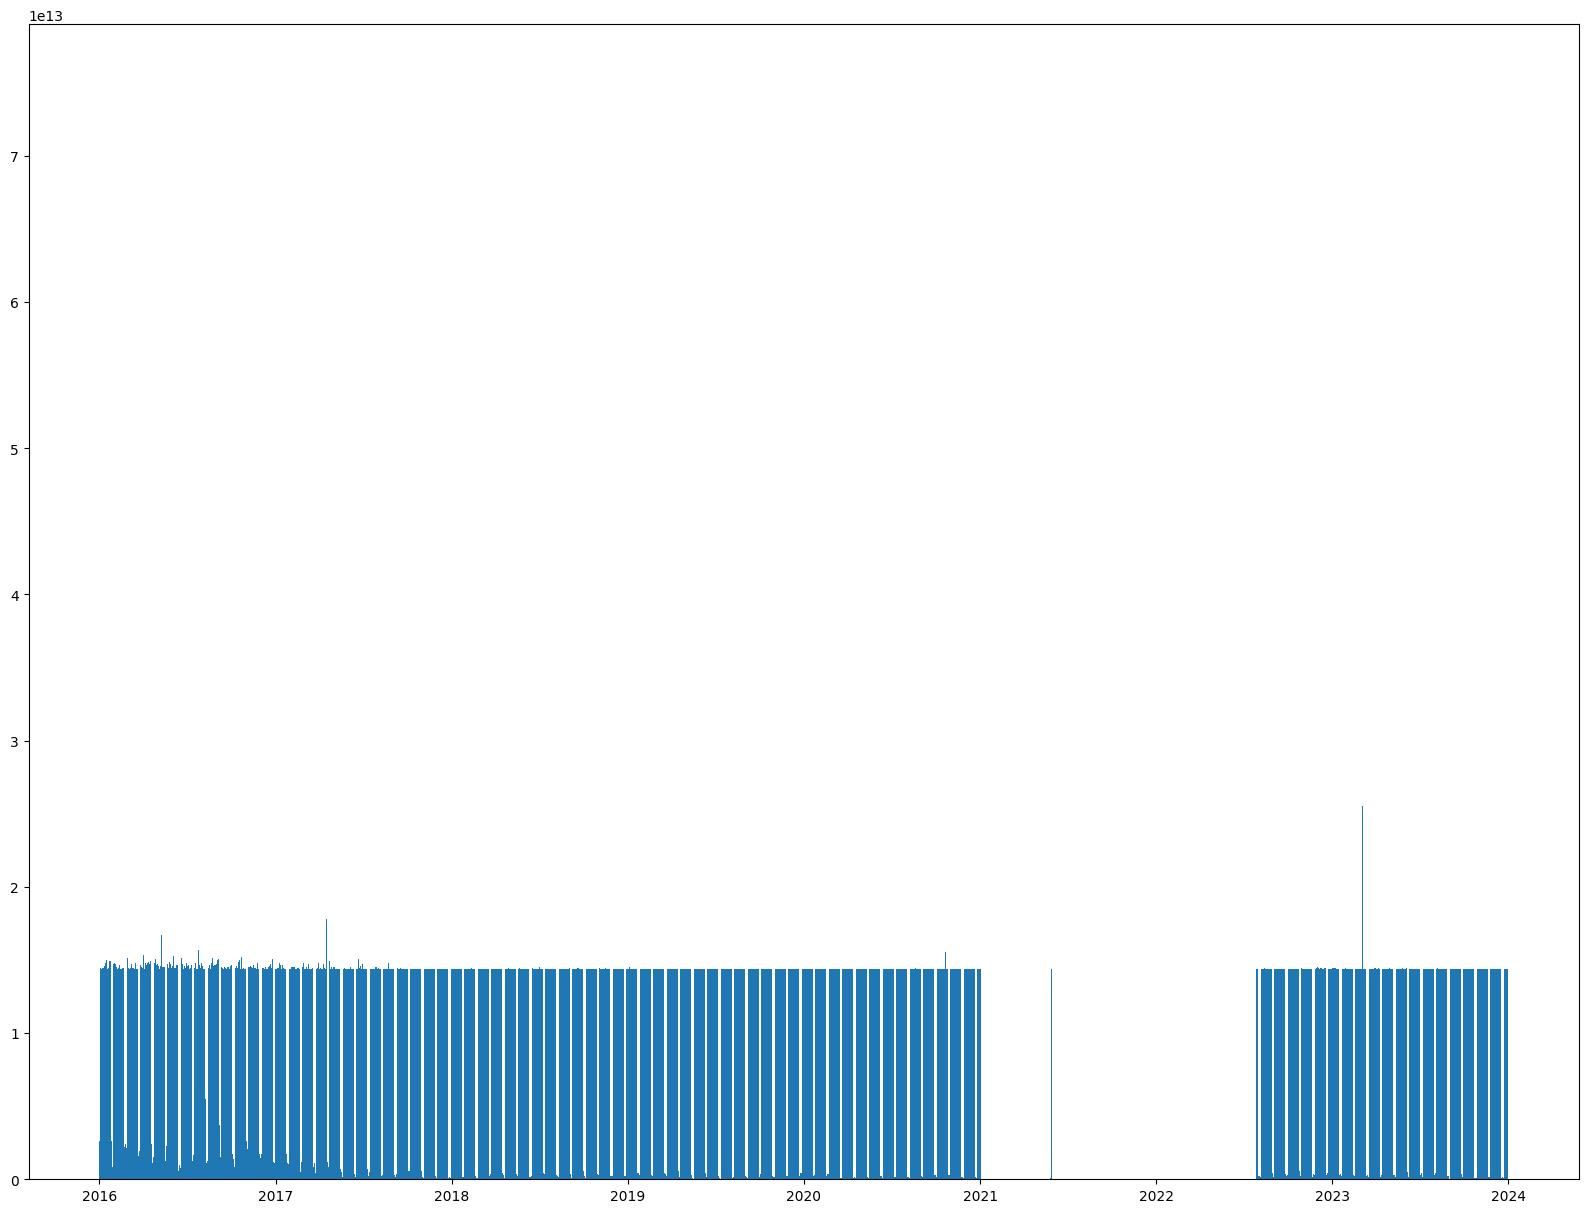

In [64]:
DELTA = MIN[MIN['timedelta'] > pd.Timedelta('1 minute')]

plt.figure(figsize=(20,15))
#sb.barplot(x=range(len(DELTA)),y="timedelta", data= DELTA)
#plt.hist(MIN['missing points'])
plt.bar(DELTA["date"],DELTA["timedelta"])
plt.show()

In [65]:
len(DELTA)

244996

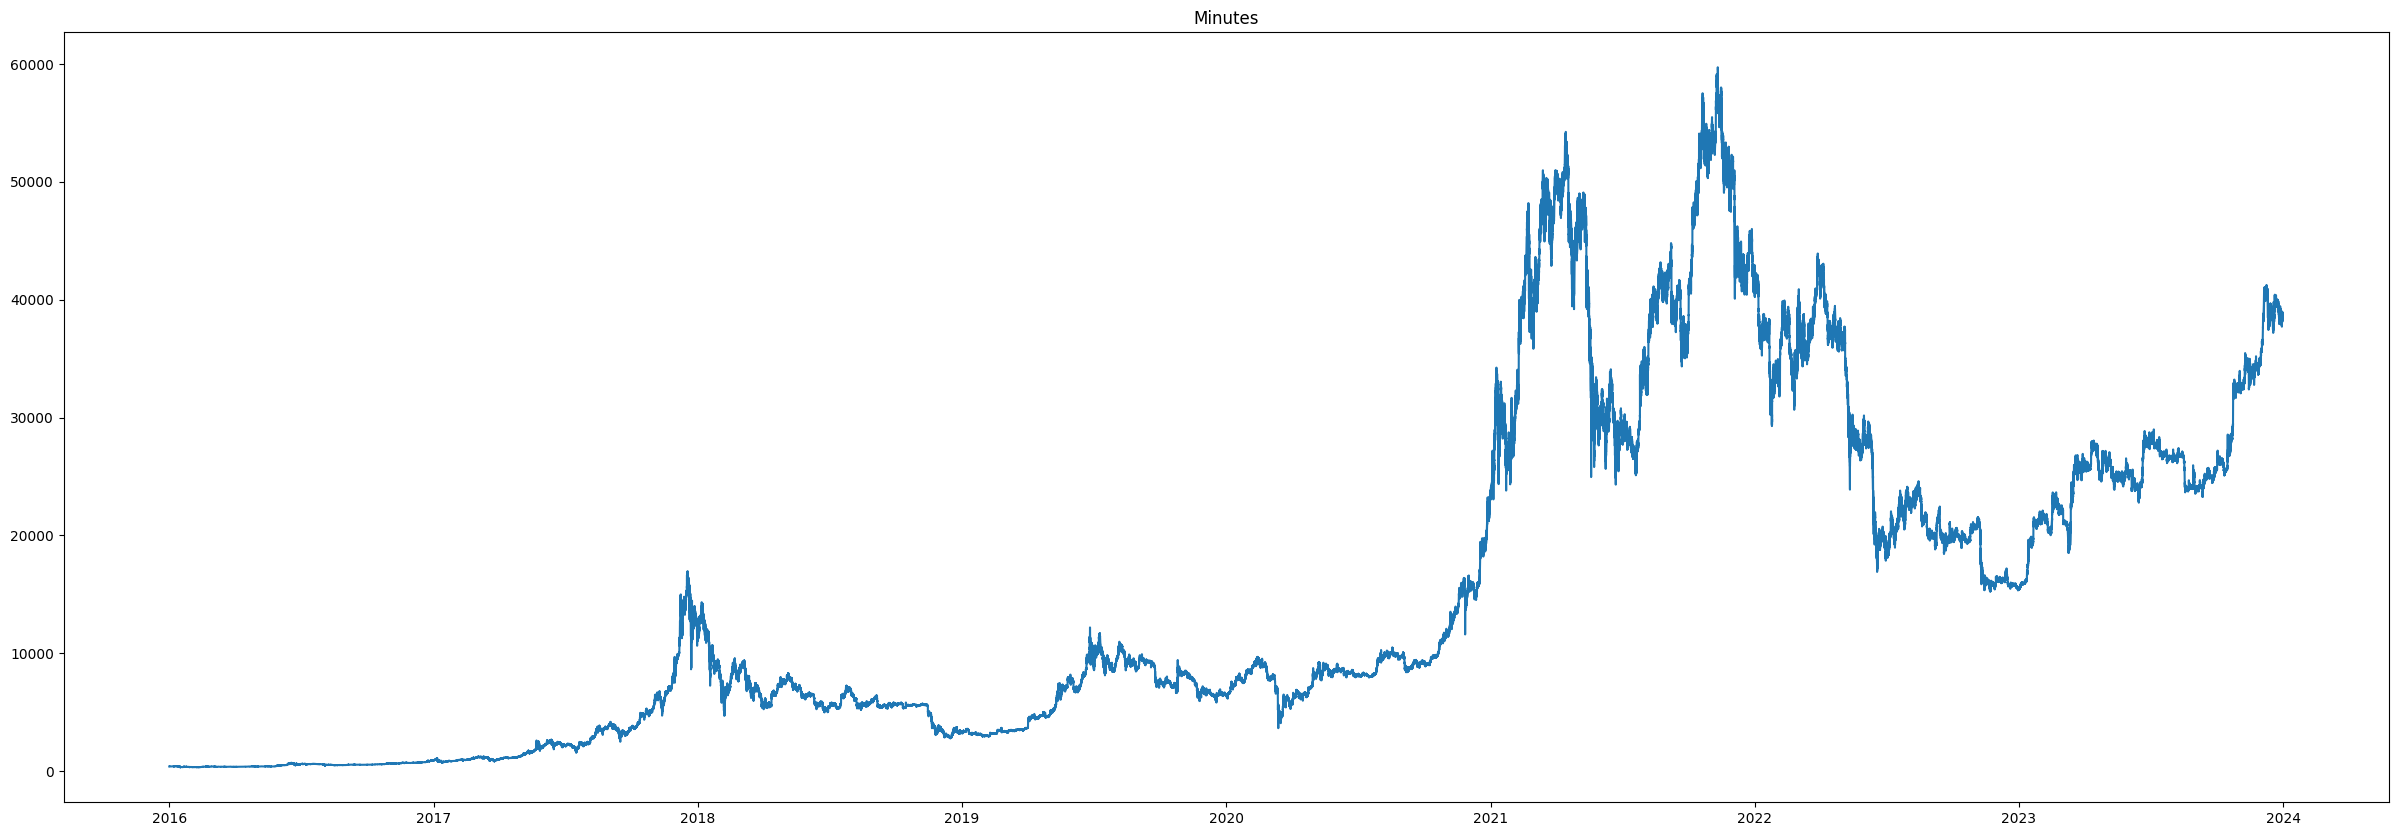

In [70]:
plt.figure(figsize=(30,10))
plt.plot(MIN['date'],MIN['high'])
plt.title("Minutes")
plt.show()



In [28]:
type(MIN['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

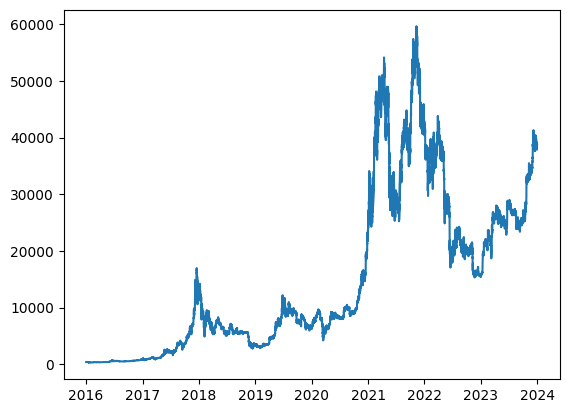

In [66]:
plt.plot(HOUR['date'],HOUR['high'])
plt.show()

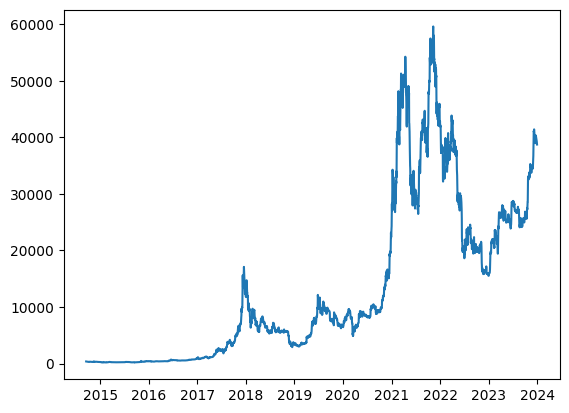

In [67]:
plt.plot(DAY['date'],DAY['high'])
plt.show()

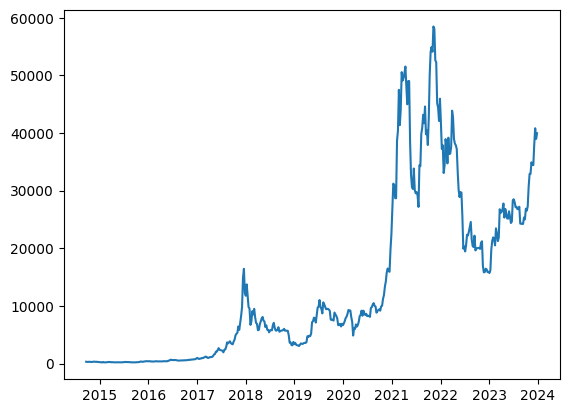

In [68]:
plt.plot(WEEK['date'],WEEK['high'])
plt.show()

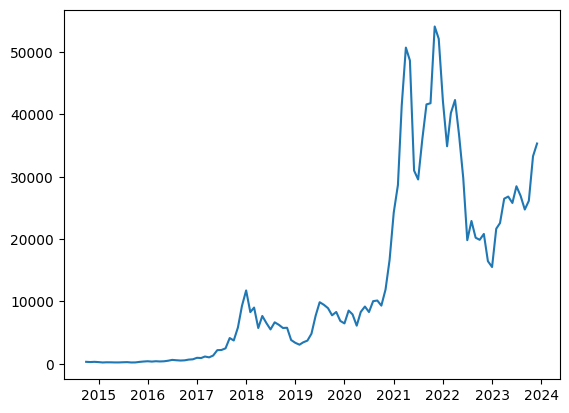

In [69]:
plt.plot(MONTH['date'],MONTH['high'])
plt.show()

In [71]:
#DF dim

print("Minute:",len(MIN))
print("Hour:",len(HOUR))
print("Day:",len(DAY))
print("Week:",len(WEEK))
print("Month:",len(MONTH))

Minute: 3164443
Hour: 44177
Day: 3393
Week: 484
Month: 111


In [72]:
print("Minute max delta:",MIN["delta_high"].max())
print("Hour max delta:",HOUR["delta_high"].max())
print("Day max delta:",DAY["delta_high"].max())
print("Week max delta:",WEEK["delta_high"].max())
print("Month max delta:",MONTH["delta_high"].max())

Minute max delta: 1922.4850000000008
Hour max delta: 2597.5750000000007
Day max delta: 5671.5640625000015
Week max delta: 9969.0244140625
Month max delta: 12685.9365234375


In [77]:
MIN['date'][2512400:2512500]

2512400   2022-05-09 16:50:00
2512401   2022-05-09 16:51:00
2512402   2022-05-09 16:52:00
2512403   2022-05-09 16:53:00
2512404   2022-05-09 16:54:00
                  ...        
2512495   2022-05-09 18:25:00
2512496   2022-05-09 18:26:00
2512497   2022-05-09 18:27:00
2512498   2022-05-09 18:28:00
2512499   2022-05-09 18:29:00
Name: date, Length: 100, dtype: datetime64[ns]

In [99]:
def highs_lows(DF):
    MAX = DF.loc[DF['delta_high'] == DF["delta_high"].max()]
    MIN = DF.loc[DF['delta_high'] == DF["delta_high"].min()]
    print(MIN,MAX)
    
    plt.plot(DF['date'][MAX.index[0]-10:MAX.index[0]+10],DF['high'][MAX.index[0]-10:MAX.index[0]+10])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.plot(DF['date'][MIN.index[0]-10:MIN.index[0]+10],DF['high'][MIN.index[0]-10:MIN.index[0]+10])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

         Unnamed: 0        unix                date    volume     high  \
2512447     2512447  1652117820 2022-05-09 17:37:00  9.318183  30089.1   

               low  delta_high  delta_low       timedelta  
2512447  29979.695   -1911.835      36.85 0 days 00:01:00            Unnamed: 0        unix                date     volume       high  \
2512446     2512446  1652117760 2022-05-09 17:36:00  22.090139  32000.935   

               low  delta_high  delta_low       timedelta  
2512446  29942.845    1922.485      16.48 0 days 00:01:00  


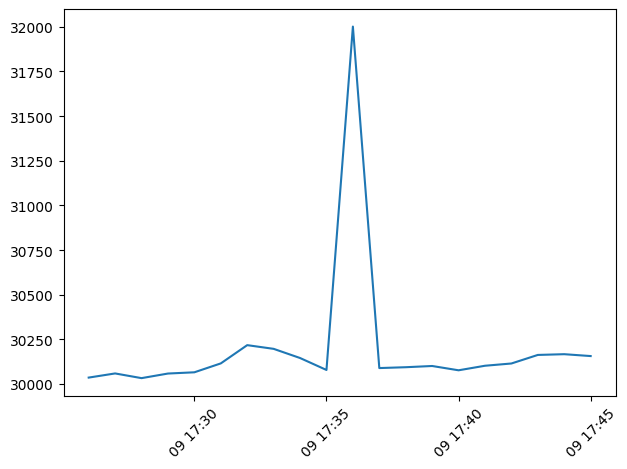

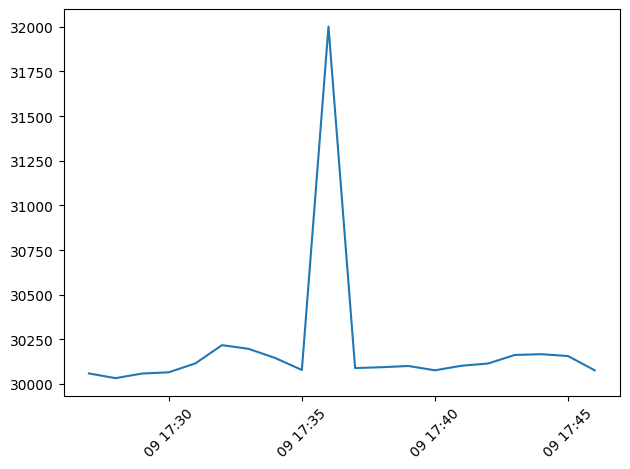

In [100]:
highs_lows(MIN)

       Unnamed: 0        unix                date      volume      high  \
27062       27062  1621609200 2021-05-21 15:00:00  356.933139  31380.42   

             low  delta_high  delta_low       timedelta  
27062  30429.715   -2823.025   -1564.16 0 days 01:00:00          Unnamed: 0        unix                date      volume       high  \
23944       23944  1610352000 2021-01-11 08:00:00  279.975195  28824.275   

            low  delta_high  delta_low       timedelta  
23944  27966.91    2597.575     2095.8 0 days 01:00:00  


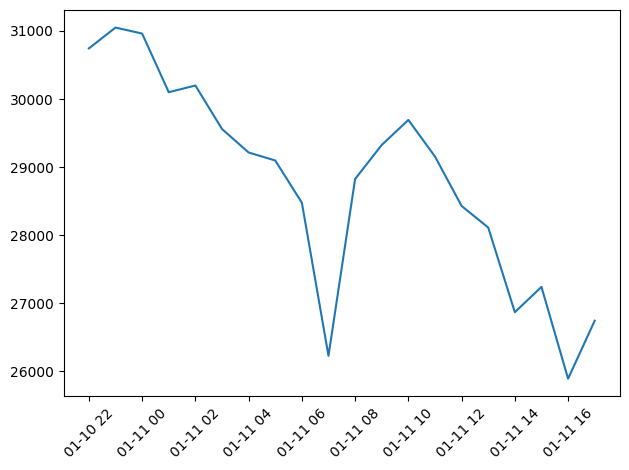

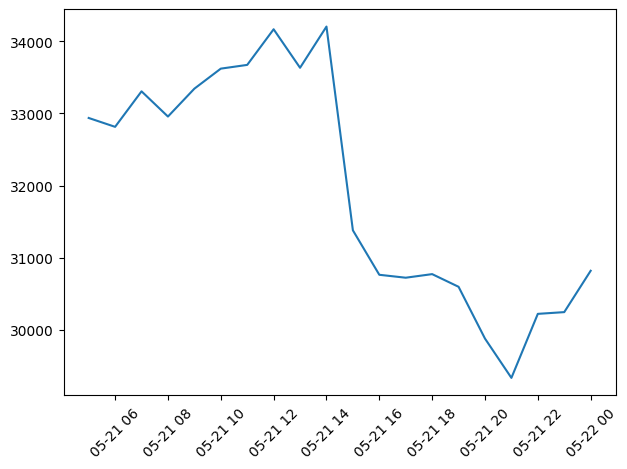

In [101]:
highs_lows(HOUR)

      Unnamed: 0        unix       date        volume          high  \
2430        2430  1620864000 2021-05-13  4.004421e+10  42586.722969   

               low   delta_high    delta_low timedelta  
2430  38919.119375 -5256.191328 -1708.471484    1 days         Unnamed: 0        unix       date        volume          high  \
2336        2336  1612742400 2021-02-08  4.209419e+10  38642.931641   

               low   delta_high   delta_low timedelta  
2336  31636.291016  5671.564063  555.507187    1 days  


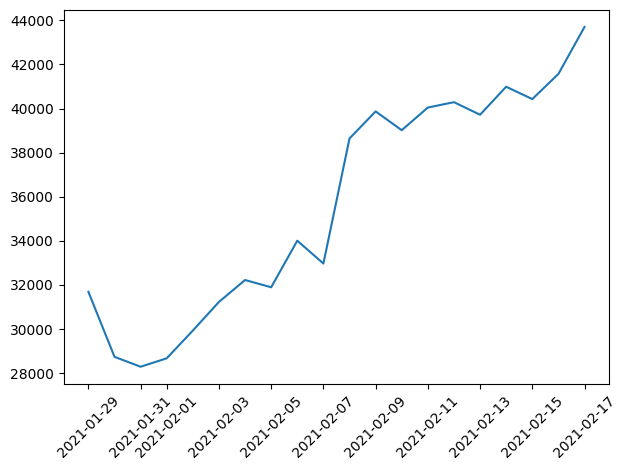

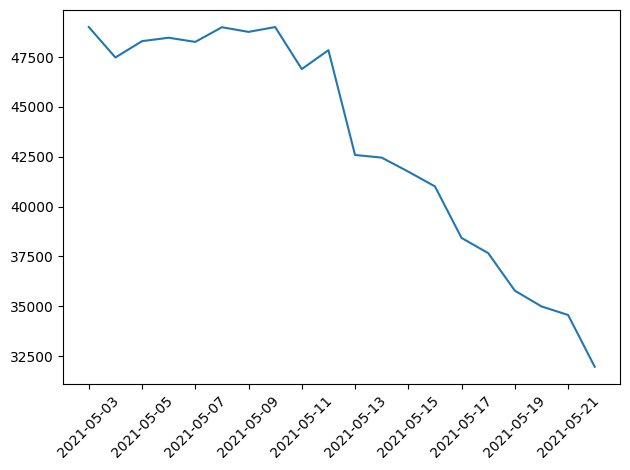

In [102]:
highs_lows(DAY)

     Unnamed: 0        unix       date        volume          high  \
347        2434  1621209600 2021-05-17  3.080798e+10  38424.395469   

             low    delta_high    delta_low timedelta  
347  34479.65875 -10579.185391 -9931.183047    7 days        Unnamed: 0        unix       date        volume          high  \
333        2336  1612742400 2021-02-08  4.209419e+10  38642.931641   

              low   delta_high    delta_low timedelta  
333  31636.291016  9969.024414  4925.698242    7 days  


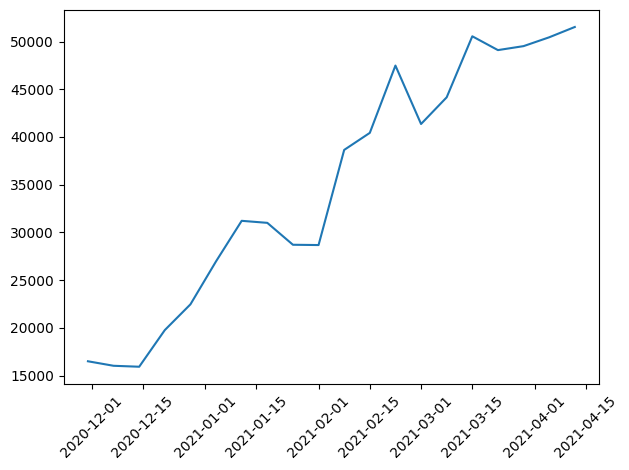

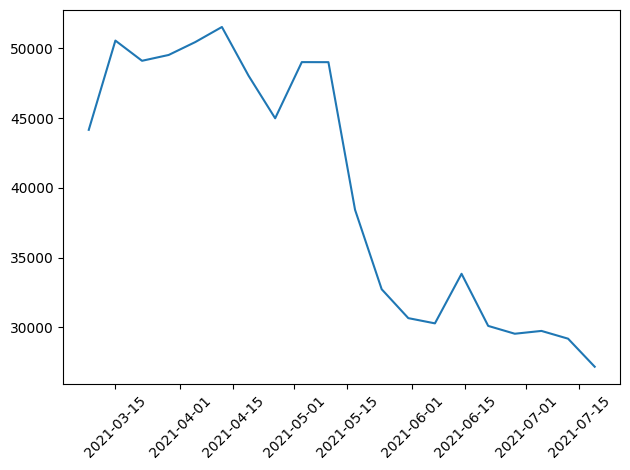

In [103]:
highs_lows(WEEK)

    Unnamed: 0        unix       date        volume          high  \
80        2449  1622505600 2021-06-01  1.417627e+10  30985.635977   

             low    delta_high     delta_low timedelta  
80  29254.213867 -17652.375898 -18185.281445   31 days       Unnamed: 0        unix       date        volume         high  \
77        2357  1614556800 2021-03-01  2.236395e+10  41359.84375   

             low    delta_high     delta_low timedelta  
77  37301.140078  12685.936523  10590.547305   28 days  


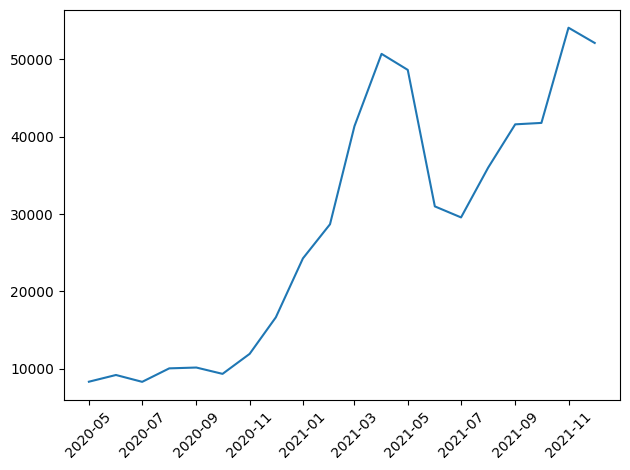

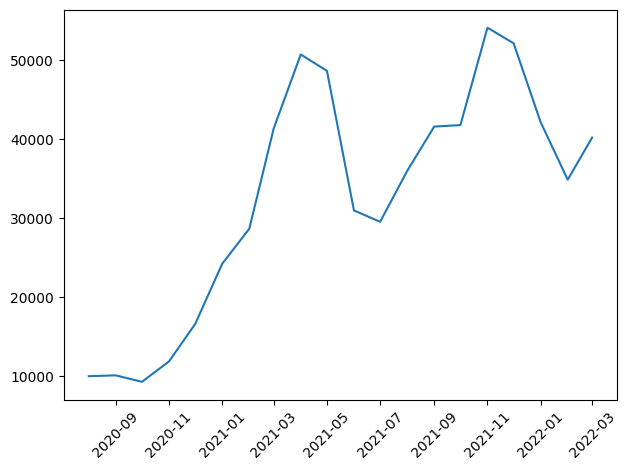

In [104]:
highs_lows(MONTH)

In [107]:
df = DAY

### 1. Index vs delta index / raw vs logarithm

The logarithm of the deltas gives a more informative picture than the raw index values.
-> shows the growth in relation to the overall data and suposible bull runs seem less impressive 



## Thesis 1: Logarithm Charts represents the market behaviour more truthfully

[nan, -0.775472401825323, -1.3903820901528157, 0.018395825412386844, -0.9280712049099684, -0.7020340092541884, 1.4351315257544577, -0.6431386932936758, -0.8955818974327147, -0.7856994752680366, -0.6729722796761102, -0.6454625680667018, -1.111988639384918, 0.7989377052056565, -0.1790302300970597, -0.7428640204084518, -0.7274168438497168, -0.9092324682842888, -1.2583270051560773, 0.16332330105826953, -0.7598683313756112, 0.9680203933935947, 1.372628417807508, -0.8068458715856465, -0.6493845420710055, 0.9647597273065349, 1.0746280377912485, 1.0754709970521277, -0.7576208186627478, -0.8648047340287508, -0.9343461620762555, 0.8801263021690886, 0.019739126645791978, -0.4626894796086034, 0.4008776549969668, -0.4673096047509613, 0.07906462988696183, -1.2400582824062563, -0.5111241831906165, 0.29662569628231555, -0.15971409628106262, 0.07812408903784292, -0.35976185776213193, -0.44225789375939917, -0.3219490893823046, -0.6248475090486121, -0.9621617954578872, 0.6877815501057606, -0.403816485268

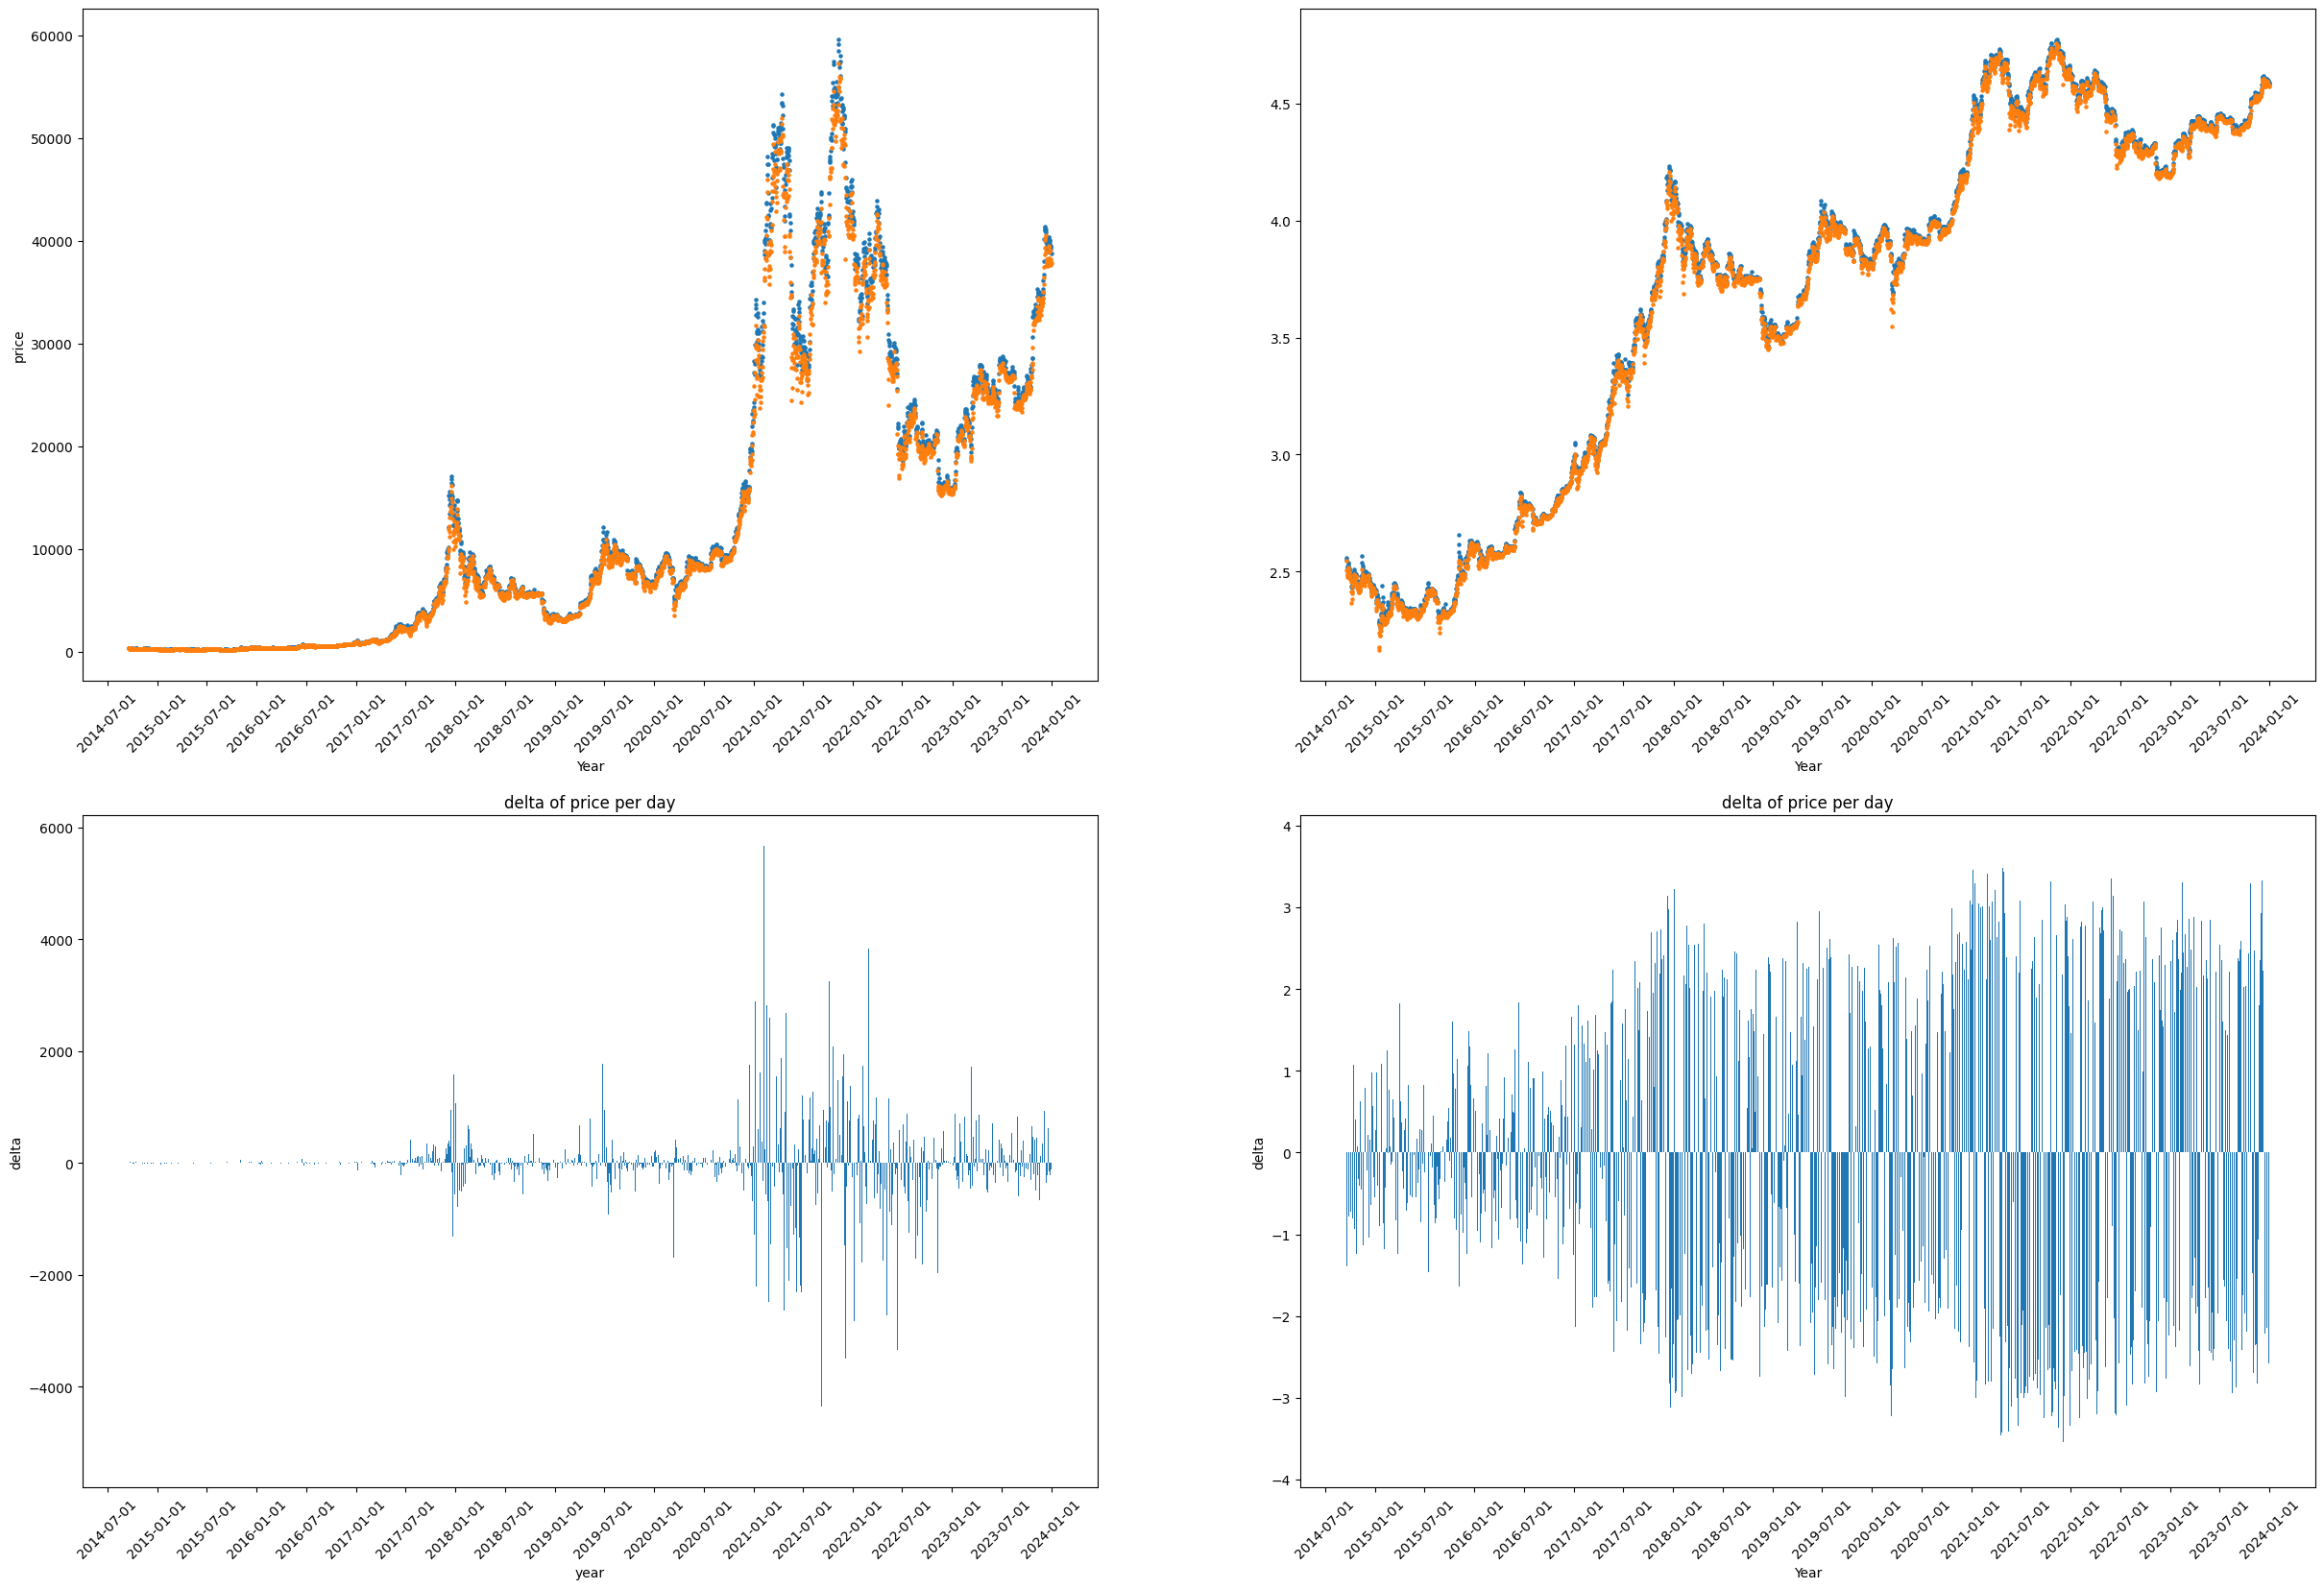

In [108]:

fig = plt.figure(figsize=(30,20))


plt.subplot(2, 2, 1)

plt.scatter(df["date"], df["high"], s=5, label="high")
plt.scatter(df["date"], df["low"], s=5, label="low")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")

plt.ylabel("price")




plt.subplot(2, 2, 2)
plt.scatter(df["date"], Mandelbrot.log10(df["high"]), s=5, label="high")
plt.scatter(df["date"], Mandelbrot.log10(df["low"]), s=5, label="low")

#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")





plt.subplot(2, 2, 3)
plt.bar(df["date"], df["delta_high"])
 
plt.xlabel("year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")



print(Mandelbrot.log10(df["delta_high"])[0:50])

plt.subplot(2, 2, 4)
plt.bar(df["date"], Mandelbrot.log10(df["delta_high"]))

 
plt.xlabel("Year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")

plt.show()

### Probability density function of delta values

it is widely accepted, that the values follow a normal distribution

Mandelbrot suggests, that it is rather a Cauchy distribution

Cauchy:
-> higher peak around the mean
-> no fixed variance
-> more considerate of frequent "higher" outliers (turbulences in the market)


When to Use Cauchy Instead of Gaussian?

Choose Cauchy if:

    You see extreme outliers

    Data has heavy tails (outliers that don't “go away” with more samples)

    Mean and variance don't make sense (or are misleading)

Choose Gaussian if:

    Data clusters well around a central value

    Tails decay quickly (no big outliers)

## Thesis 2 Fat tails: the distribution follows a Cauchy PDF

#How is it tested?

The delta values are plotted (Histogramm)
Different PDFs are calculated (norm, cauchy etc)

--> what is the best way to evaluate the  best fit?
Kolmogorov



In [5]:
import seaborn as sb
from pathlib import Path

distdict = yaml.safe_load(Path('static/dist_color.yml').read_text())

print(distdict)

{'cauchy': 'pink', 'expon': 'r', 'lognorm': 'g', 'norm': 'k'}


In [3]:
#Analyzing how the fit works (for Gauss)

data = MONTH["delta_high"].dropna()

#getattr?
dist = getattr(scipy.stats, "norm") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #sigma (variance) for gauss
print("scale:",scale) #mu (mean) for gauss

x = np.linspace(scale - 3*loc, scale + 3*loc, 100)
print("testdata")
print(x)

def gauss_pdf(x, mu, sigma):
   
    Gauss_data = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
    return Gauss_data


print("Guass Data:")
print(gauss_pdf(x,scale,loc))

(710.5827306845022, 5067.084930787807)
arg: ()
loc: 710.5827306845022
scale: 5067.084930787807
testdata
[2935.33673873 2978.40235878 3021.46797882 3064.53359886 3107.5992189
 3150.66483894 3193.73045898 3236.79607902 3279.86169907 3322.92731911
 3365.99293915 3409.05855919 3452.12417923 3495.18979927 3538.25541932
 3581.32103936 3624.3866594  3667.45227944 3710.51789948 3753.58351952
 3796.64913956 3839.71475961 3882.78037965 3925.84599969 3968.91161973
 4011.97723977 4055.04285981 4098.10847985 4141.1740999  4184.23971994
 4227.30533998 4270.37096002 4313.43658006 4356.5022001  4399.56782014
 4442.63344019 4485.69906023 4528.76468027 4571.83030031 4614.89592035
 4657.96154039 4701.02716044 4744.09278048 4787.15840052 4830.22402056
 4873.2896406  4916.35526064 4959.42088068 5002.48650073 5045.55212077
 5088.61774081 5131.68336085 5174.74898089 5217.81460093 5260.88022097
 5303.94584102 5347.01146106 5390.0770811  5433.14270114 5476.20832118
 5519.27394122 5562.33956126 5605.40518131 56

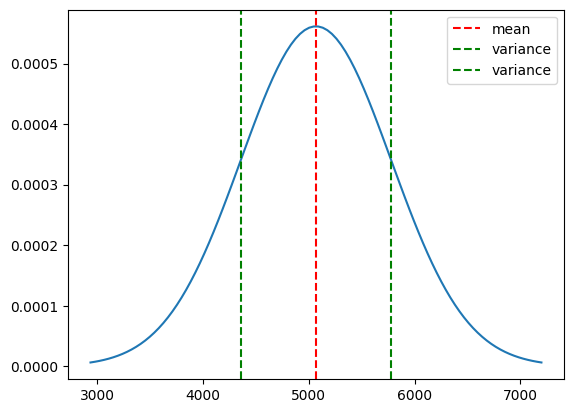

In [4]:
#reconstructing Gauss from fit
plt.plot(x, gauss_pdf(x,scale,loc))
plt.axvline(scale, color='red', linestyle='--', label='mean')
plt.axvline(scale-loc, color='green', linestyle='--', label='variance')
plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [5]:
#analyze fit for cauchy

dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #x0 (peak value) for cauchy
print("scale:",scale) #gamma (the distance from the peak x0 where the PDF drops to half its maximum value) for cauchy

x = np.linspace(loc - 5*scale, loc + 5*scale, 500)

def cauchy_pdf(x,x0,gamma):
    
    Cauchy_data = 1 / (np.pi * gamma * (1 + ((x - x0)/gamma)**2))
    
    return Cauchy_data


(72.1785187923022, 1073.44949476017)
arg: ()
loc: 72.1785187923022
scale: 1073.44949476017


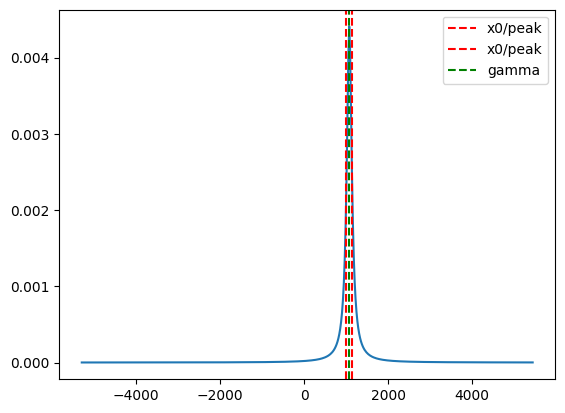

In [6]:
#reconstructing Cauchy from fit
plt.plot(x, cauchy_pdf(x,scale,loc))
plt.axvline(scale-loc, color='red', linestyle='--', label='x0/peak')
plt.axvline(scale+loc, color='red', linestyle='--', label='x0/peak')
plt.axvline(scale, color='green', linestyle='--', label='gamma')
#plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [26]:
# how to determine which fit is the best?

#GAUSS
#gauss_dist = getattr(scipy.stats, "gauss") #creates an object according to the parameters
#print(dist)
gauss_params = scipy.stats.norm.fit(data,method="mle")

#CAUCHY
#cauchy_dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
cauchy_params = scipy.stats.cauchy.fit(data,method="mle")


#Log Likelihood
#---> Compares how well the Model fits
#higher == better
loglik_gauss = np.sum(norm.logpdf(data, *gauss_params))
loglik_cauchy = np.sum(cauchy.logpdf(data, *cauchy_params))

print(f"Log-likelihood (Gauss): {loglik_gauss}")
print(f"Log-likelihood (Cauchy): {loglik_cauchy}")


#Akaikon Information Criterion (AIC)
#uses Loglikelihood values
#-> for models of different complexity (different amount of parameters)
#AIC helps you avoid being tricked by a model that fits well only because it's more complex
#lower == better

def aic(loglik, num_params):
    print(loglik,num_params)
    aic = 2 * num_params - 2 * loglik
    print(aic)
    return aic

aic_gauss = aic(loglik_gauss, 2)
aic_cauchy = aic(loglik_cauchy, 2)

print(f"AIC (Gauss): {aic_norm}")
print(f"AIC (Cauchy): {aic_cauchy}")

#Bayesian Information Criterion (BIC)


#Cramer von Mises
#More balanced than Anderson or KS: cares about both center and tails
#smaller == better
cvm_gauss = scipy.stats.cramervonmises(data, 'norm')
cvm_cauchy = scipy.stats.cramervonmises(data, 'cauchy')

print(f"CVM (Gauss): {cvm_gauss}")
print(f"CVM (Cauchy): {cvm_cauchy}")

#Kolmogorov Smirnov ->>> not suitable/ limited
# anderson ---> not suitable for cauchy

#scipy.stats.cramervonmises?



Log-likelihood (Gauss): -1283.4802755119795
Log-likelihood (Cauchy): -1237.3563776727024
-1283.4802755119795 2
2570.960551023959
-1237.3563776727024 2
2478.7127553454047
AIC (Gauss): 2570.960551023959
AIC (Cauchy): 2478.7127553454047
CVM (Gauss): CramerVonMisesResult(statistic=11.27312062988594, pvalue=3.4848057772762786e-10)
CVM (Cauchy): CramerVonMisesResult(statistic=10.947740469079005, pvalue=1.9998869227322302e-10)


In [8]:
def best_fit(data,PDF = "norm"):
    
    data = data.dropna()
    
    if PDF == "norm":
        params = scipy.stats.norm.fit(data,method="mle")
        #Log Likelihood Gauss
        loglik = np.sum(norm.logpdf(data, *params))
    elif PDF == "cauchy":
        params = scipy.stats.cauchy.fit(data,method="mle")
        #Log Likelihood Cauchy
        loglik = np.sum(cauchy.logpdf(data, *params))
    else:
        print("invalid PDF value")
    
    
    #Akaikon Information Criterion (AIC)
    aic = 2 * 2 - 2 * loglik
    
    #Cramer von Mises
    cvm = scipy.stats.cramervonmises(data, PDF)
    cvm = [cvm.statistic,cvm.pvalue]  #cvm gives an object --> transform to simple list
    
                                        
    return loglik, aic, cvm

In [15]:
ll_gauss, aic_gauss, cvm_gauss = best_fit(MONTH["delta_high"],"norm")
#ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

type(cvm_gauss)
cvm_gauss.statistic
cvm_gauss.pvalue

3.4848057772762786e-10

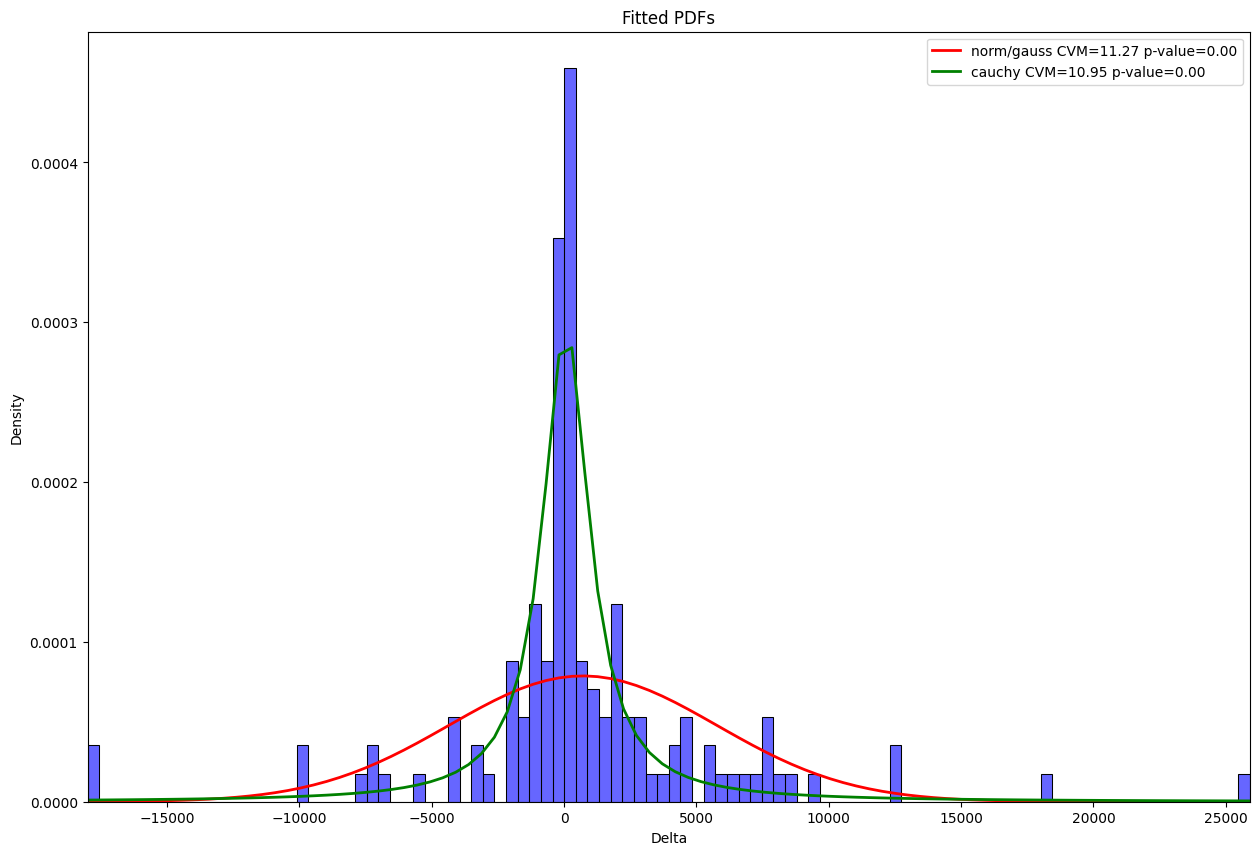

In [29]:
# GAUSS FIT
from scipy.stats import norm, cauchy, lognorm, expon, kstest
data = MONTH["delta_high"].dropna()

#plt.hist(data, bins=100, density=True)
ll_gauss, aic_gauss, cvm_gauss = best_fit(data,"norm")
ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

plt.figure(figsize=(15,10))

sb.histplot(data, bins=100, kde=False, stat = "density", color = 'blue', alpha=0.6)


    
params_gauss, pdf_fitted_gauss, x_gauss = Mandelbrot.gauss_pdf(data)
params_cauchy, pdf_fitted_cauchy, x_cauchy = Mandelbrot.cauchy_pdf(data)

    
plt.plot(x_gauss, pdf_fitted_gauss, 'r', linewidth=2, 
         label="norm/gauss CVM=%.2f p-value=%.2f"%(cvm_gauss[0],cvm_gauss[1]))
plt.plot(x_cauchy, pdf_fitted_cauchy, 'g', linewidth=2, 
         label="cauchy CVM=%.2f p-value=%.2f"%(cvm_cauchy[0],cvm_cauchy[1]))


plt.xlim(min(data),max(data))
plt.legend(loc="upper right")
plt.xlabel('Delta')
plt.ylabel('Density')
plt.title('Fitted PDFs')
#plt.savefig("PDF.png")
plt.show()

In [34]:
def plot_fit(DF):
    from scipy.stats import norm, cauchy, lognorm, expon, kstest
    data = DF["delta_high"].dropna()

    #plt.hist(data, bins=100, density=True)
    ll_gauss, aic_gauss, cvm_gauss = best_fit(data,"norm")
    ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

    fig = plt.figure(figsize=(15,10))

    sb.histplot(data, bins=500, kde=False, stat = "density", color = 'blue', alpha=0.6)
    
    params_gauss, pdf_fitted_gauss, x_gauss = Mandelbrot.gauss_pdf(data)
    params_cauchy, pdf_fitted_cauchy, x_cauchy = Mandelbrot.cauchy_pdf(data)

    
    plt.plot(x_gauss, pdf_fitted_gauss, 'r', linewidth=2, 
         label="norm/gauss CVM=%.2f p-value=%.5f"%(cvm_gauss[0],cvm_gauss[1]))
    plt.plot(x_cauchy, pdf_fitted_cauchy, 'g', linewidth=2, 
         label="cauchy CVM=%.2f p-value=%.5f"%(cvm_cauchy[0],cvm_cauchy[1]))


    plt.xlim(min(data),max(data))
    plt.legend(loc="upper right")
    plt.xlabel('Delta')
    plt.ylabel('Density')
    plt.title('Fitted PDFs')
    
    return fig

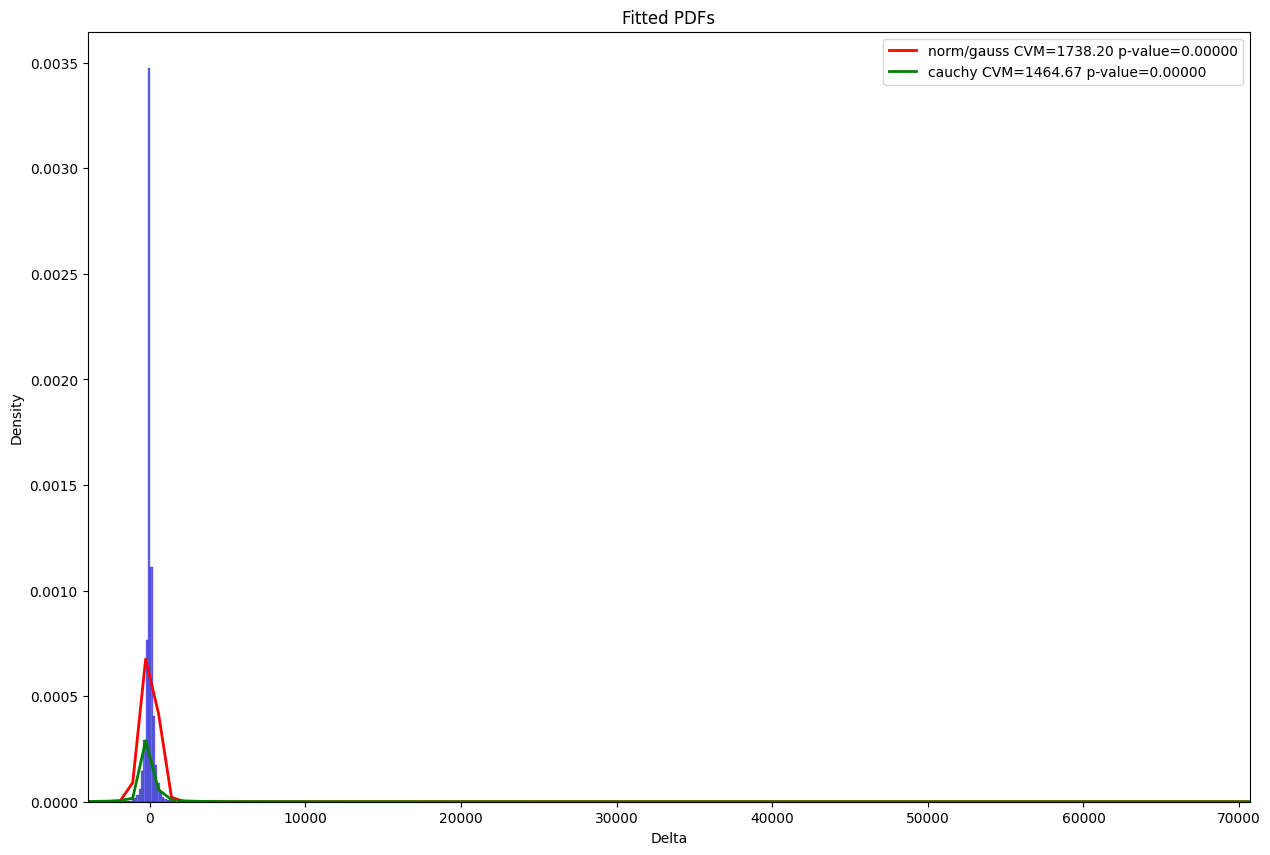

In [35]:
fig = plot_fit(HOUR)


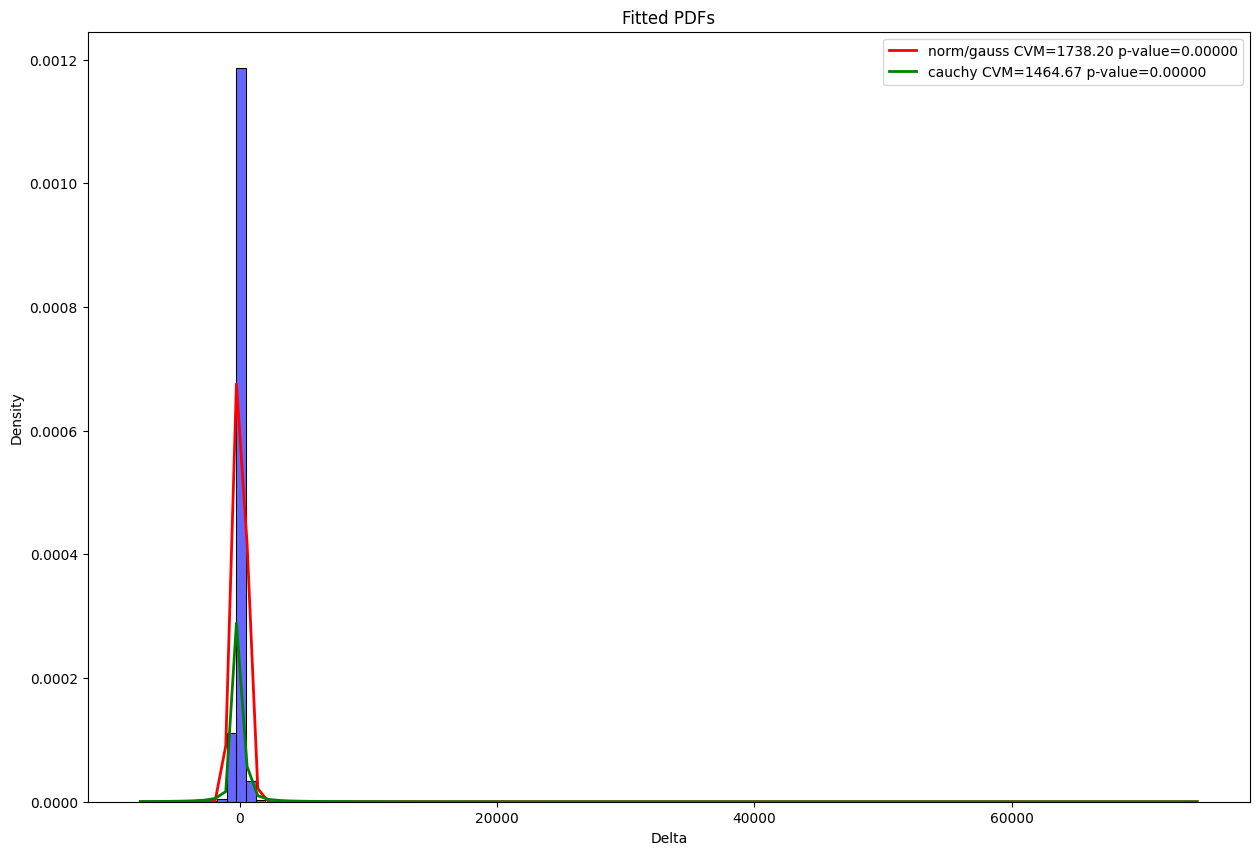

In [25]:
fig = plot_fit(HOUR)

In [26]:
HOUR.head()

,unix,date,high,low,delta_high,delta_low
2,1609700400,2021-01-03 19:00:00,26028.02,25959.78,NaN,NaN
62,1609704000,2021-01-03 20:00:00,25924.91,25896.15,-103.11,-63.63
122,1609707600,2021-01-03 21:00:00,26670.77,26621.29,745.86,725.14
182,1609711200,2021-01-03 22:00:00,26580.99,26478.00,-89.78,-143.29
242,1609714800,2021-01-03 23:00:00,26224.14,26143.79,-356.85,-334.21


# 3. The memory of data

## old patterns correlate with newer patterns

## Hurt exponent / Variance